# EDA on Olympics Data 


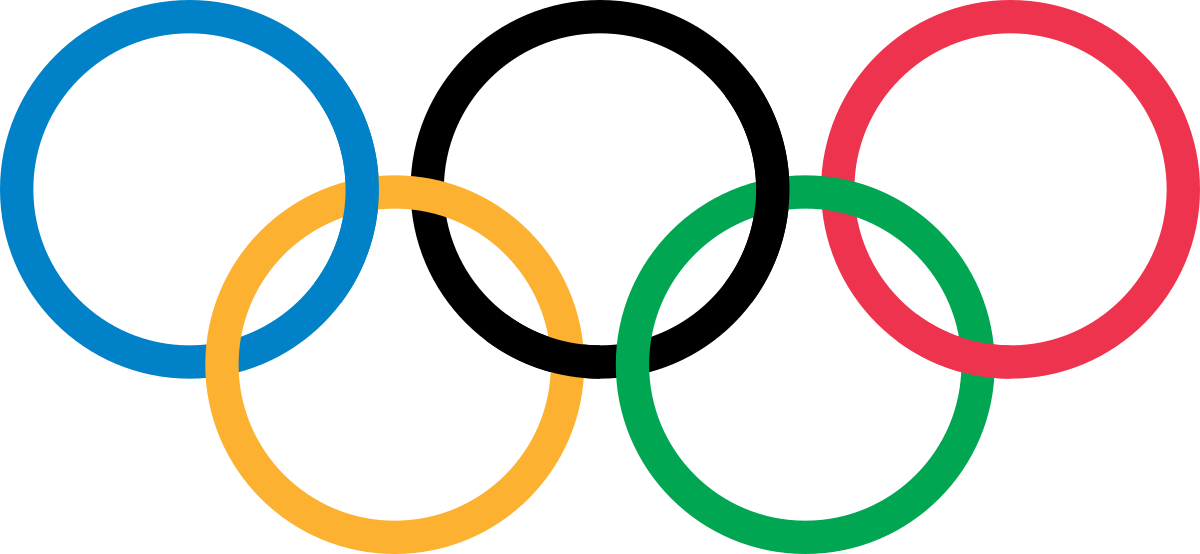


## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
4. [Data Preprocessing](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis being performed on the Sports category**](#section501)<br>
    - 5.1.1 [Unique Sports played per year in Olympics?](#section50101)<br>
    - 5.1.2 [Ten most Popular Sports in Olympics?](#section50102)<br><br>
  - 5.2 [**Analysis being performed on the Country category**](#section502)<br>
    - 5.2.1 [Unique countries played(or won model) per year in Olympics?](#section50201)<br>
    - 5.2.2 [Which country has won the most gold medals in Olympic games?](#section50202)<br>
    - 5.2.3 [Medal Distribution by Top Countries by Sport?](#section50203)<br>
    - 5.2.4 [Medal count of Top Countries by Years?](#section50204)<br>
    - 5.2.5 [City hosting maximum events and Medals by their types?](#section50205)<br> 
    - 5.2.6 [Medal Distribution by Country on World Map?](#section50206)<br><br>
  - 5.3 [**Analysis being performed on the Medal category on the basis of Gender and Athlete**](#section503)<br>
    - 5.3.1 [Men Category Medal by year](#section50301)<br>
    - 5.3.2 [Women Category Medal by year](#section50302)<br>
    - 5.3.3 [Athletes with Maximum Medals by their Medals count and Medal Types](#section50303)<br>
    - 5.3.4 [Medals of Top five Male and Female Athletes](#section50304)<br>
    - 5.3.5 [Gender Distribution of Total Medals](#section50305)<br><br>
  - 5.4 [**Analysis being performed on the Medal**](#section504)<br>
    - 5.4.1 [Medal count by year](#section50401)<br>
    - 5.4.2 [Number of Medals count by Sport Category](#section50402)<br>
    - 5.4.3 [Medal Distribution of Top 10 Countries](#section50403)<br>
    - 5.4.4 [Year wise distribution of Gold, Silver and Bronze Medals](#section50404)<br>
    - 5.4.5 [Contribution of different medal by their type](#section50405)<br><br>
 
6. [Conclusion](#section6)  
7. [Actionable Insights](#section7)  

<a id=section1></a>

## 1. Problem Statement

**Summer Olypmics** have been conducted in two year within a tenure of four year.The first modern Olympics were held in Athens, Greece, in 1896. In the opening ceremony, King Georgios I and a crowd of    60,000 spectators welcomed 280 participants from 13 nations (all male), who would compete in 43 events, including track and field, gymnastics, swimming, wrestling, cycling, tennis, weightlifting, shooting and fencing. All subsequent Olympiads have been numbered even when no Games take place (as in 1916, during World War I, and in 1940 and 1944, during World War II). The Olympics truly took off as an international sporting event after 1924, when the VIII Games were held in Paris. Some 3,000 athletes (with more than 100 women among them) from 44 nations competed that year, and for the first time the Games featured a closing ceremony.  Eighty years later, when the 2004 Summer Olympics returned to Athens for the first time in more than a century, nearly 11,000 athletes from a record 201 countries competed. The Olympics game have huge difference among the various discipline. It is analysed that some disciplines are widely used whereas other one are not that widely used .Gender gap is quite different for the male and Female Athletes of the world. .Olympic Games is the highest sporting event in the world where all the participants participate with their full spirit and try to compete with different **Gender, Nationality, Sports Events**. We will figure out how the different countries has been performing in the olympic games over the years and understanding the gender role in the oympics is there any relation with their economic prosperity and the no. of medals won by that country.

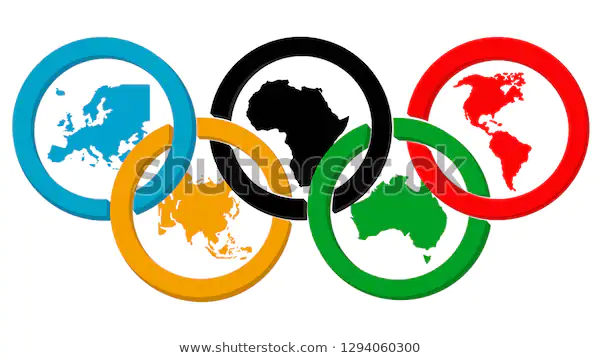



In [1]:
!pip install matplotlib

In [2]:
!pip install seaborn

In [3]:
!pip install plotly

In [4]:
!pip install chart_studio

In [5]:
!pip install pandas-profiling==2.2.0

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.set_option('display.precision', 3)               # To display values only upto three decimal places.
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

import warnings
warnings.filterwarnings('ignore')  # To suppress all the warnings in the notebook.

plt.style.use('fivethirtyeight')

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)


<a id=section3></a>

## 3. Loading Data
In this Data Visualization, we are using one datasets about Olympics Games held in Summer.

- **Olympics details** dataset: This dataset contains information about the olympics being conducted **year** wise ,**city**in
    which it has been conducted,**Sports** area which have been played, **Discipline** for the area it has been played,**Athelete** 
    name who have participated in the olympics  and **country** of the Athlete, **Gender** of the athlete,**Event** in which the athlete 
    won the medal ,**Medal** defines the type of the medal Gold, Silver and Bronze.  
    
    

### Importing  Dataset

In [2]:
olypics_df = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv")

### 3.1 Description of the  Dataset

This dataset contains information about Year, City, Sport, Discipline, Athelete Name, Country, Gender, Event and Medal.
Column Name	 Description

| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
| Year                           | The Year in which Summer Olympics Held.                                                    | 
| City                           | City Which hosted the Summer Olympic Event.                                                | 
| Sport                          | The Sport Name for Olympic Event.                                                          | 
| Discipline                     | Name of Discipline on which sport belongs to.                                              |
| Athlete                        | Name of Athelete Who has won the medal.                                                    |
| Country                        | The Country Code which has won the medal.                                                  |
| Gender                         | Male or Female category.                                                                   |
| Event                          | Name of Olympic event.                                                                     |
| Medal                          | Gold,Silver or Bronze Medal.                                                               |

 

In [28]:
olypics_df .head(5)

Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics  Swimming   HAJOS, Alfred       HUN     Men     
1  1896  Athens  Aquatics  Swimming   HERSCHMANN, Otto    AUT     Men     
2  1896  Athens  Aquatics  Swimming   DRIVAS, Dimitrios   GRE     Men     
3  1896  Athens  Aquatics  Swimming   MALOKINIS, Ioannis  GRE     Men     
4  1896  Athens  Aquatics  Swimming   CHASAPIS, Spiridon  GRE     Men     

                        Event   Medal  
0  100M Freestyle              Gold    
1  100M Freestyle              Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors  Gold    
4  100M Freestyle For Sailors  Silver

In [17]:
olypics_df .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
Year          31165 non-null int64
City          31165 non-null object
Sport         31165 non-null object
Discipline    31165 non-null object
Athlete       31165 non-null object
Country       31161 non-null object
Gender        31165 non-null object
Event         31165 non-null object
Medal         31165 non-null object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


- ```info``` function gives us the following insights into the df_menu dataframe:

  - There are a total of **31165 samples (rows)** and **9 columns** in the dataframe.
  
  - There are **1 columns** with a **numeric** datatype and **8 columns** with an **object** datatype.
  
  - There are **0 missing** values in the data.

In [18]:
olypics_df .describe()

Year
count  31165.000
mean   1970.483 
std    33.158   
min    1896.000 
25%    1948.000 
50%    1980.000 
75%    2000.000 
max    2012.000

- ```describe``` function gives us the following insights into the data:
  
  - **Year** column is having minimum year as **1896** and maximum year as **2012**.

  

<a id=section302></a>

### 3.2 Pandas Profiling before Data Preprocessing

- Here, we will perform **Pandas Profiling before preprocessing** our dataset, so we will name the **output file** as __profiling_before_preprocessing.html__. 


- The file will be stored in the directory of your notebook. Open it using the jupyter notebook file explorer and take a look at it and see what insights you can develop from it. 


- Or you can **output the profiling report** in the **current jupyter notebook** as well as shown in the code below. 

In [13]:
import pandas_profiling 

In [40]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_before_preprocessing.html

profile = olypics_df.profile_report(title='olypics profiling before data processing')
profile.to_file(output_file='olympics_before_preprocessing.html')

# To output the pandas profiling report on the notebook.

olypics_df.profile_report(title='Pandas Profiling before Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 9
- Number of observations: 31165
- Missing cells: 4 (<0.1%)


__Variables types__: 
- Numeric = 1
- Categorical = 8

<br>

- **Year** has **distinct value** is 27   and **Unique value percentage** is less than 0.1%.


- **City** has **22 unique value  **. **Maximum time** it is conducted in London


- **Sports** is **distinct value** is 43   and **Unique value percentage** is less than 0.1%.** Aquatics** is the most
played sports 

 
- **Discipline** has **distinct value** is 67   and **Unique value percentage** is 0.2%. **Athletics** is the maximum 
discipline. 


- **Athlete** has **distinct value** is 22762  and **Unique value percentage** is 73%. The **best sportsman** is Michal Phelepe 
with 22 medals.


- **Country** has a **148 unique values**.**Maximum Medal** has been taken by the USA.


- **Gender** has**distinct value** is 2   and **Unique value percentage** is less than 0.1%. **Male athlete** are clearly more 
then the **Female** is only 27 %


- **Event** has **distinct value** is 666   and **Unique value percentage** is 2.1%. ** Football** is the maximum events.


- **Medal** has **distinct value** is 3   and **Unique value percentage** is less than 0.1%.Medal are equally distributed for Gold 
,Silver and Bronze medal. 


- All the **remaining columns** can be studied in the same way.

## 4. Data Preprocessing

### 4.1 Data Preprocessing

- Here I will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


- In order to avoid any errors, I have already run **Pandas Profiling** before running the code below.

In [39]:
olypics_df.shape

(31165, 9)

- The number of rows is 31165 and columns as 9

In [12]:
olypics_df.columns

Index(['Year', 'City', 'Sport', 'Discipline', 'Athlete', 'Country', 'Gender',
       'Event', 'Medal'],
      dtype='object')

- The columns are **Year**, **Sports** , **Discipline**, **Athlete** , **Country**, **Gender**, **Event**, **Medal**.

In [7]:
#Dealing with missing value, to find null values
total = olypics_df.isnull().sum().sort_values(ascending=False)
percent = (olypics_df.isnull().sum()/olypics_df.isnull().count()).sort_values(ascending=False)
data_missed = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
data_missed.head(20)
print(data_missed)

            Total    Percent
Country     4      1.283e-04
Medal       0      0.000e+00
Event       0      0.000e+00
Gender      0      0.000e+00
Athlete     0      0.000e+00
Discipline  0      0.000e+00
Sport       0      0.000e+00
City        0      0.000e+00
Year        0      0.000e+00


- As Country Column have 4 missing value with their percentage as 1.283% 

In [3]:
#Identifying the missing values in Country Descending order wise
olypics_df.Country.isnull().sort_values(ascending=False)

31072    True 
31110    True 
31091    True 
29603    True 
10387    False
         ...  
20777    False
20778    False
20779    False
20780    False
0        False
Name: Country, Length: 31165, dtype: bool

- Identitfying the location where I am able to find the missing value 

In [4]:
#Dropping missing rows from Country
olypics_df.loc[[31072,31110,31091,29603],"Country"]

31072    NaN
31110    NaN
31091    NaN
29603    NaN
Name: Country, dtype: object

- Dropping all the rows with missing countries 

In [5]:
olypics_df.drop([31072,31110,31091,29603],axis=0,inplace=True)

- Fixing the changes made in the table

In [6]:
olypics_df[olypics_df.duplicated(subset=None, keep='first')]

Year    City      Sport Discipline       Athlete Country Gender  \
16099  1980  Moscow  Hockey     Hockey     SINGH, Singh  IND     Men     
29785  2012  London  Badminton  Badminton  ZHAO, Yunlei  CHN     Women   

         Event Medal  
16099  Hockey   Gold  
29785  Doubles  Gold

- Finding the duplicate value in the datset

In [9]:
olypics_df[(olypics_df['Year'] == 1980) & (olypics_df['Athlete'] == 'SINGH, Singh')][(olypics_df['Year'] == 1980) & (olypics_df['Athlete'] == 'SINGH, Singh')]

Year    City   Sport Discipline       Athlete Country Gender   Event  \
16098  1980  Moscow  Hockey  Hockey     SINGH, Singh  IND     Men    Hockey   
16099  1980  Moscow  Hockey  Hockey     SINGH, Singh  IND     Men    Hockey   

      Medal  
16098  Gold  
16099  Gold

- Checking on duplicate value in detail to understand that it is exact same value thus need to be removed

In [7]:
olypics_df = olypics_df.drop_duplicates()

- Dropping the duplivate value rows from the dataset

In [11]:
olypics_df.head()

Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics  Swimming   HAJOS, Alfred       HUN     Men     
1  1896  Athens  Aquatics  Swimming   HERSCHMANN, Otto    AUT     Men     
2  1896  Athens  Aquatics  Swimming   DRIVAS, Dimitrios   GRE     Men     
3  1896  Athens  Aquatics  Swimming   MALOKINIS, Ioannis  GRE     Men     
4  1896  Athens  Aquatics  Swimming   CHASAPIS, Spiridon  GRE     Men     

                        Event   Medal  
0  100M Freestyle              Gold    
1  100M Freestyle              Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors  Gold    
4  100M Freestyle For Sailors  Silver

In [7]:
olypics_df.shape

(31163, 9)

- checking the new shape of the datset after removing the rows

In [24]:
olypics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31163 entries, 0 to 31164
Data columns (total 9 columns):
Year          31163 non-null int64
City          31163 non-null object
Sport         31163 non-null object
Discipline    31163 non-null object
Athlete       31163 non-null object
Country       31159 non-null object
Gender        31163 non-null object
Event         31163 non-null object
Medal         31163 non-null object
dtypes: int64(1), object(8)
memory usage: 2.4+ MB


In [11]:
olypics_df.reset_index(drop = True, inplace = True)

<a id=section402></a>

### 4.2 Pandas Profiling after Data Preprocessing



- Here, I will perform **Pandas Profiling after preprocessing** our dataset, so we will name the **output file** as __profiling_after_preprocessing.html__.

In [17]:
# To output pandas profiling report to an external html file.
# Saving the output as profiling_after_preprocessing.html
'''
profile = olypics_df.profile_report(title='Pandas Profiling after Data Preprocessing')
profile.to_file(output_file="profiling_after_preprocessing.html")
'''
### To output the pandas profiling report on the notebook.
olypics_df.profile_report(title='Pandas Profiling after Data Preprocessing', style={'full_width':True})

**Observations from Pandas Profiling before Data Processing** <br><br>
__Dataset info__:
- Number of variables: 9
- Number of observations: 	31163
- Missing cells: 4


__Variables types__: 
- Numeric = 1
- Categorical =8

<br>

- Michal Phelepe is the top player followed by larisa latania 
- London is the maximum occuring city 
- USA is the top country 
- Athleteics is the most played game discipline 
- Event has Foot bal mostly happened 
- Gender is the Male whcih is much higher then the Female 
- Medal are almost the same for Gold,Silver and Bronze 
- Sports is the Aquatics being played 
- Year is for 1896 to 2012


<a id=section5></a>

## 5. Exploratory Data Analysis

**Exploratory Data Analysis(EDA)** is an **approach to analyzing data sets** to **summarize** their **main characteristics**, often with **visual methods**. 


- It includes **cleaning, munging, combining, reshaping, slicing, dicing, and transforming data** for **analysis** purpose.


- The **primary goal of EDA** is to **maximize the analyst's insight into a data set** and into the **underlying structure of a data set**, while **providing all of the specific items** that an **analyst would want to extract from a data set**, such as:
 <br><br> 
  - A list of **outliers**.<br><br>
  
  - A **good-fitting model**.  <br><br>
  
  - **Estimates for parameters**.<br><br>
  
  - **Uncertainties** for those **estimates**.<br><br>
  
  - A **ranked list** of **important factors**.<br><br>
  
  - **Conclusions** as to whether **individual factors are statistically significant**.<br><br>
  
  - A **sense of robustness of conclusions**.<br><br>
  
  - **Optimal settings**.<br><br>

<a id=section501></a>

## 5.1 Analysis being performed on the Sports category

<a id=section50101></a>

### 5.1.1 Unique Sports played per year in Olympics

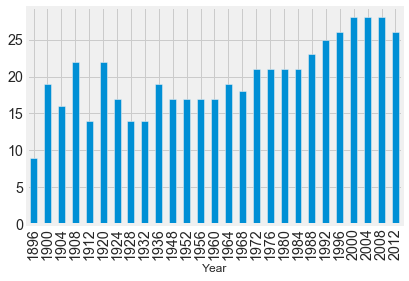

In [87]:
olypics_df.groupby(['Year'])['Sport'].nunique().plot.bar()

- Categories of Sports increased with the passage of time 

<a id=section50102></a>

### 5.1.2 Ten most popular games in olympics

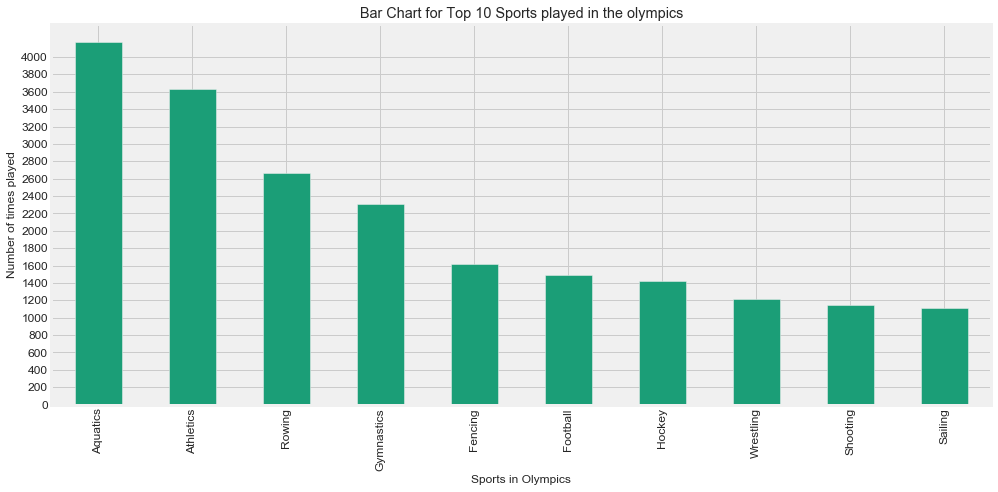

In [89]:
#Top 10 Sports to be played in Olympics
olypics_df['Sport'].value_counts().head(10)
olypics_df['Sport'].value_counts().head(10).plot.bar(figsize=(15,7), colormap='Dark2', fontsize=12, yticks=np.arange(0, 4200, 200))
plt.xlabel('Sports in Olympics')
plt.ylabel('Number of times played')
plt.title('Bar Chart for Top 10 Sports played in the olympics')
plt.show()

- **Aquatics** is the top played game followed by **Athletics**, **Rowing**, **Gymnastics**, **Fencing**, **Football**, **Hockey**

- The number of Sports being played in the olympics have been **increased** and the Top 10 Sports with top as **Aquatics** ,
**Athletics**, **Rowing** , **Gymnastics** , **Fencing**, **Football**, **Hockey** , **Wrestling**, **Shooting**, **Sailing**.

<a id=section502></a>

## 5.2 Analysis being performed on the Country category

<a id=section50201></a>

### 5.2.1 Number of distinct countries played(or won model) per year in Olympics?

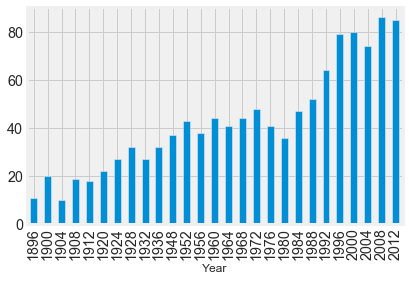

In [90]:
olypics_df.groupby(['Year'])['Country'].nunique().plot.bar()

- The participation of the various winning countries have increased a lot .Thus can be concluded that olypics have reputation     and fame thus countries participlating in the game and winning medals have increased. In the starting i.e. 1896 it can be       seen that approx 10 countries participating now as can be see in the bar plot **more then 80 countries** have been winning     the medal for the year 2012.

<a id=section50202></a>

### 5.2 Which country has won the most  medals in Olmpics games?

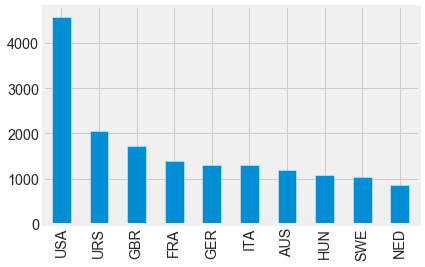

In [91]:
df = olypics_df['Country'].value_counts().head(10)
df.plot.bar()

In [28]:
olypics_df['Country'].value_counts().head(10)

USA    4585
URS    2049
GBR    1720
FRA    1396
GER    1305
ITA    1296
AUS    1189
HUN    1079
SWE    1044
NED    851 
Name: Country, dtype: int64

In [92]:
df = olypics_df[olypics_df['Year']>1990]['Country'].value_counts().head(10)  # Medal Distribution  after the year 1990
df.plot.bar()

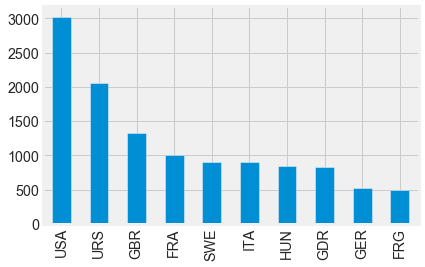

In [93]:
df = olypics_df[(olypics_df['Year']<1990)]['Country'].value_counts().head(10)  # Medal Distribution  before year 1990
df.plot.bar()

In [38]:
olypics_df[(olypics_df['Country']=='AUS')]['Year'].unique()

array([1896, 1900, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960,
       1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004,
       2008, 2012], dtype=int64)

- Olympics has been dominated by **USA**, as clearly visible that USA has the highest number of Medals.
- Before spliting on the year 1990 USSR was the second country after USA having most number of Medals.
- After split on the 1990 year, Australia has shown a tremendous growth in Medal Achievement.
- United Kingdom has shown a consitent decline in its Medal Tally over the years.

<a id=section50203></a>

### 5.2.3 Medal distribution by Top Countries by Sport

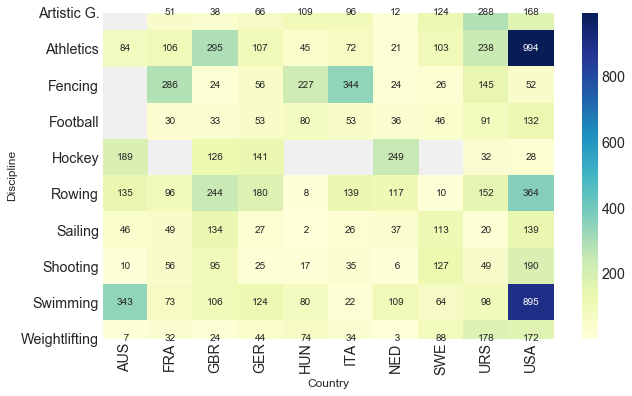

In [59]:
olypics_df.loc[olypics_df['Discipline'].str.contains('Wrestling'),'Discipline'] ='Wrestling'
olypics_df.loc[olypics_df['Discipline'].str.contains('Weightlifting'),'Discipline'] ='Weightlifting'
check = olypics_df.loc[olypics_df['Country'].isin(olypics_df['Country'].value_counts()[:10].index)]
check=check[check['Discipline'].isin(olypics_df['Discipline'].value_counts()[:10].index)]
check=check.groupby(['Country','Discipline'])['Sport'].count().reset_index()
check=check.pivot('Discipline','Country','Sport')
sns.heatmap(check,cmap='YlGnBu',annot=True,fmt='2.0f')
fig=plt.gcf()
fig.set_size_inches(9,6)
plt.show()

- Here we are showing the Discipline wise distribution of Medals for each country. We can see USA has Maximum Medals in
  Athletics Event

<a id=section50204></a>

### 5.2.4 Medal count of Top Countries by Years

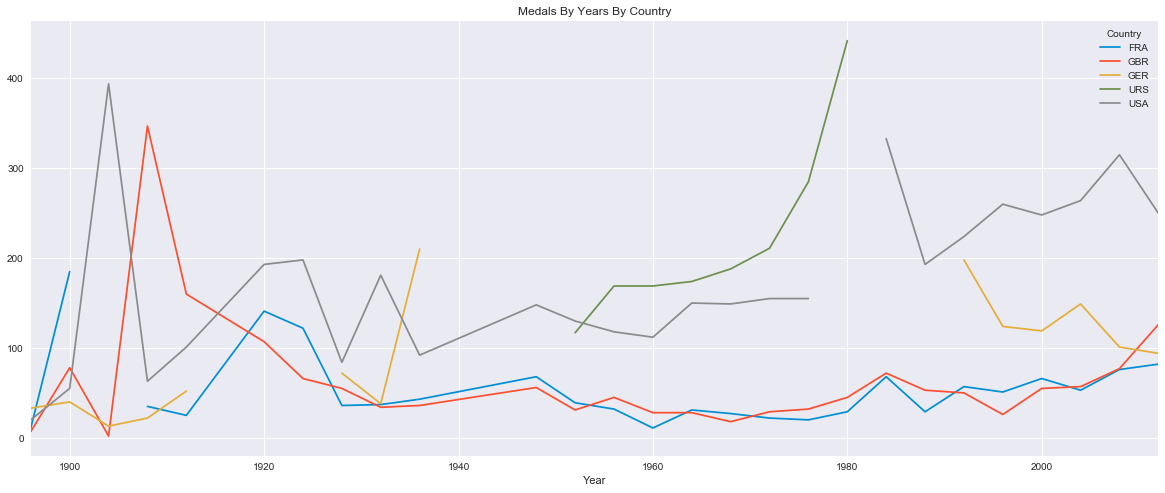

In [19]:
test1=olypics_df.groupby(['Country','Year'])['Medal'].count().reset_index()
test1=test1[test1['Country'].isin(olypics_df['Country'].value_counts()[:5].index)]
test1=test1.pivot('Year','Country','Medal')
test1.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals By Years By Country')
plt.show()

- Here we can see the Year wise trend of Medal Distribution for different Countries We can see the consistency in the 
  performance of France and Russia from 1940 onwards.

<a id=section50205></a>

### 5.2.5 City hosting maximum events and Medals by their types

In [22]:
gold_df = olypics_df[olypics_df['Medal']=='Gold']
silver_df = olypics_df[olypics_df['Medal']=='Silver']
bronze_df = olypics_df[olypics_df['Medal']=='Bronze']

In [23]:
medal_silver = silver_df.groupby(['Year','City']).count().xs('London',level='City').loc[:,'Medal'].sort_values(ascending=False)
medal_gold = gold_df.groupby(['Year','City']).count().xs('London',level='City').loc[:,'Medal'].sort_values(ascending=False)
medal_Bronze = bronze_df.groupby(['Year','City']).count().xs('London',level='City').loc[:,'Medal'].sort_values(ascending=False)

medal_Merge= pd.concat([medal_gold,medal_silver, medal_Bronze],axis=1)

medal_Merge.columns = ['Gold_Medal','Silver_Medal', 'Bronze_Medal']

medal_Merge

Gold_Medal  Silver_Medal  Bronze_Medal
Year                                        
1908  311         282           211         
1948  276         270           268         
2012  635         633           680

In [105]:
gold_df.groupby(['Year','City']).count()

Sport  Discipline  Athlete  Country  Gender  \
Year City                                                                 
1896 Athens                 64     64          64       64       64       
1900 Paris                  178    178         178      178      178      
1904 St Louis               188    188         188      188      188      
1908 London                 311    311         311      311      311      
1912 Stockholm              301    301         301      301      301      
1920 Antwerp                497    497         497      497      497      
1924 Paris                  301    301         301      301      301      
1928 Amsterdam              229    229         229      229      229      
1932 Los Angeles            213    213         213      213      213      
1936 Berlin                 299    299         299      299      299      
1948 London                 276    276         276      276      276      
1952 Helsinki               300    300         300      300      300      
1956 Melbourne / Stockholm  298    298         298      298      298      
1960 Rome                   295    295         295      295      295      
1964 Tokyo                  330    330         330      330      330      
1968 Mexico                 341    341         341      341      341      
1972 Munich                 387    387         387      387      387      
1976 Montreal               429    429         429      429      429      
1980 Moscow                 459    459         459      459      459      
1984 Los Angeles            483    483         483      483      483      
1988 Seoul                  506    506         506      506      506      
1992 Barcelona              558    558         558      558      558      
1996 Atlanta                615    615         615      615      615      
2000 Sydney                 663    663         663      663      663      
2004 Athens                 659    659         659      659      659      
2008 Beijing                669    669         669      669      669      
2012 London                 633    633         633      633      633      

                            Event  Medal  
Year City                                 
1896 Athens                 64     64     
1900 Paris                  178    178    
1904 St Louis               188    188    
1908 London                 311    311    
1912 Stockholm              301    301    
1920 Antwerp                497    497    
1924 Paris                  301    301    
1928 Amsterdam              229    229    
1932 Los Angeles            213    213    
1936 Berlin                 299    299    
1948 London                 276    276    
1952 Helsinki               300    300    
1956 Melbourne / Stockholm  298    298    
1960 Rome                   295    295    
1964 Tokyo                  330    330    
1968 Mexico                 341    341    
1972 Munich                 387    387    
1976 Montreal               429    429    
1980 Moscow                 459    459    
1984 Los Angeles            483    483    
1988 Seoul                  506    506    
1992 Barcelona              558    558    
1996 Atlanta                615    615    
2000 Sydney                 663    663    
2004 Athens                 659    659    
2008 Beijing                669    669    
2012 London                 633    633

In [25]:
medal_silver = silver_df.groupby(['Year','City']).count().xs('London',level='City').loc[:,'Medal'].sort_values(ascending=False)
print(medal_silver)

Year
2012    633
1908    282
1948    270
Name: Medal, dtype: int64


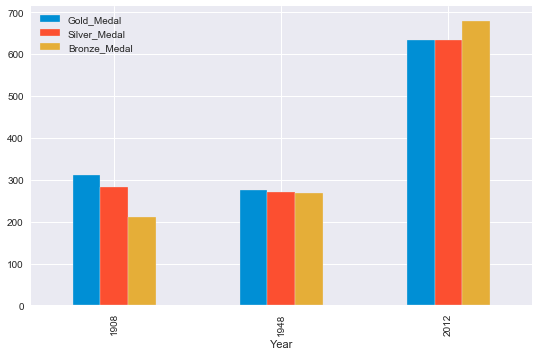

In [24]:
medal_Merge.plot.bar()
plt.show()

- **London** is the City which have won maximum medal for the year it have hosted the event.
- It shows that for the year **1908 Gold medal are the maximum ,silver medal is the least followed by bronze medal**.
- It shows that for the year **1948 Gold ,Silver and Bronze** medal are almost the same.
- It shows that for the year **2012 Gold and Silver medal are same whereas Bronze medal are little bit higher**

<a id=section50206></a>

### 5.2.6 Medal Distribution by Country on World Map

In [61]:
olypics_excel = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/summer%20olympics.csv')
medals_map=olypics_excel.groupby(['City','Country'])['Medal'].count().reset_index()
medals_map.head()

City Country  Medal
0  Amsterdam  ARG     32   
1  Amsterdam  AUS     4    
2  Amsterdam  AUT     4    
3  Amsterdam  BEL     5    
4  Amsterdam  CAN     33

- Argentena won maximum medal **32** when Olmpics games is hosted by Amsterdam  followed by Canada  **33** when hosted in 
  Amsterdam.

In [62]:
medals_map.sort_values(by='Medal', ascending=False).head(20)

City Country  Medal
466   London       GBR     529  
582   Los Angeles  USA     514  
525   London       USA     461  
741   Moscow       URS     442  
930   St Louis     USA     394  
353   Beijing      USA     315  
804   Paris        FRA     307  
919   Seoul        URS     294  
705   Montreal     URS     285  
124   Athens       USA     284  
204   Atlanta      USA     260  
721   Moscow       GDR     260  
823   Paris        USA     253  
1026  Sydney       USA     248  
271   Barcelona    USA     224  
225   Barcelona    EUN     223  
790   Munich       URS     211  
369   Berlin       GER     210  
229   Barcelona    GER     198  
513   London       SWE     194

In [68]:
# This object is used to specify the data to be plotted and its properties.
# In plotly, the data object must be a list object hence its enclosed in [].
# Here we are plotting the mean final weight value of each country on the map, which is set using the z parameter in data.
# The locations to be plotted are specified using the location parameter in data.

data = [go.Choropleth(colorscale='Viridis', autocolorscale=False, locations=medals_map['Country'], 
                      locationmode='country names', z=medals_map['Medal'], 
                      text=medals_map['Country'].unique(), colorbar=go.choropleth.ColorBar(title='Medals'), 
                      marker=go.choropleth.Marker(line=go.choropleth.marker.Line(color='rgb(200,200,200)', width=0.5)))]

In [64]:
# Creating the layout object.
# This object is used to set the layout of the plot (here we are setting the title of the plot).

layout = go.Layout(title=go.layout.Title(text='Olympics Total Medals By Country'))

In [65]:
# Creating the fig object from the data and layout objects.

fig = go.Figure(data=data, layout=layout)

In [66]:
# Plotting the data onto a world map.

iplot(fig, filename='d3-cloropleth-map')

- Here we can see visually in the graphics that USA is the Highest Medal Country with Total Medals 4585
- Other countries like Africa, Antarctica has been the lowest Medal Winner as per the graph

<a id=section503></a>

## 5.3 Analysis being performed on the Medal on the basis of Gender and Athlete

<a id=section50301></a> 

### 5.3.1 Men Category Medals by year

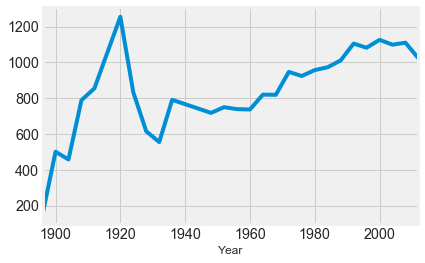

In [72]:
olypics_df[olypics_df['Gender']=='Men'].groupby('Year')['Gender'].count().plot()

- Number of Medals in Men category was reduced a lot after 1920 games
- Number of Medals in Men Category increased till year 2000 and are now in consolidated mode

<a id=section50302></a> 

### 5.3.2 Women Category Medal by year

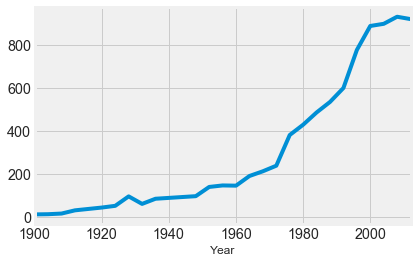

In [73]:
olypics_df[olypics_df['Gender']=='Women'].groupby('Year')['Gender'].count().plot()

- Number of Medals in Women Category has shown very good growth over the years and is not showing sign of consolidation.

<a id=section50303></a> 

### 5.3.3 Athletes with Maximum Medals by Medals count and Medal Types

In [70]:
#Correcting the Athelete Names by removing commas and proper name.
olypics_df['Athlete'] = olypics_df['Athlete'].str.split(', ').str[::-1].str.join(' ')
olypics_df['Athlete'] = olypics_df['Athlete'].str.title()

In [71]:
olypics_df['Athlete']

0        Alfred Hajos            
1        Otto Herschmann         
2        Dimitrios Drivas        
3        Ioannis Malokinis       
4        Spiridon Chasapis       
               ...               
31160    Damian Janikowski       
31161    Ghasem Gholamreza Rezaei
31162    Rustam Totrov           
31163    Artur Aleksanyan        
31164    Jimmy Lidberg           
Name: Athlete, Length: 31159, dtype: object

In [49]:
olypics_df.head()

Year    City     Sport Discipline            Athlete Country Gender  \
0  1896  Athens  Aquatics  Swimming   Alfred Hajos       HUN     Men     
1  1896  Athens  Aquatics  Swimming   Otto Herschmann    AUT     Men     
2  1896  Athens  Aquatics  Swimming   Dimitrios Drivas   GRE     Men     
3  1896  Athens  Aquatics  Swimming   Ioannis Malokinis  GRE     Men     
4  1896  Athens  Aquatics  Swimming   Spiridon Chasapis  GRE     Men     

                        Event   Medal  
0  100M Freestyle              Gold    
1  100M Freestyle              Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors  Gold    
4  100M Freestyle For Sailors  Silver

In [94]:
#Finding the Highest Medal taker Male and Female Athelete
filt1 = olypics_df['Gender']=='Men'
filt2 = olypics_df['Gender']=='Women'
print('The Highest medal taker Male Athlete is: ',olypics_df[filt1]['Athlete'].value_counts()[:1].index[0],'with: ',olypics_df[filt1]['Athlete'].value_counts()[:1].values[0],' medals')
print('The Highest medal taker Female Athlete is: ',olypics_df[filt2]['Athlete'].value_counts()[:1].index[0],'with: ',olypics_df[filt2]['Athlete'].value_counts()[:1].values[0],' medals')

The Highest medal taker Male Athlete is:  Michael Phelps with:  22  medals
The Highest medal taker Female Athlete is:  Larisa Latynina with:  18  medals


In [51]:
medal=olypics_df.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medal=medal.drop_duplicates(subset=['Medal'],keep='first')
medal.columns=[['Athlete','Medal','Count']]
medal

Athlete   Medal Count
17343  Michael Phelps      Gold    18  
587    Aleksandr Dityatin  Silver  6   
9797   Heikki Savolainen   Bronze  6

- Michal Pheleps is the highest Gold medal taker athlete.
- Aleksandr Dityatin is the highest Silver medal taker athlete.
- Heikki Savolainen is the highest Bronze medal taker athlete.

<a id=section50304></a> 

### 5.3.4 Medals of Top five Male and Female Athletes

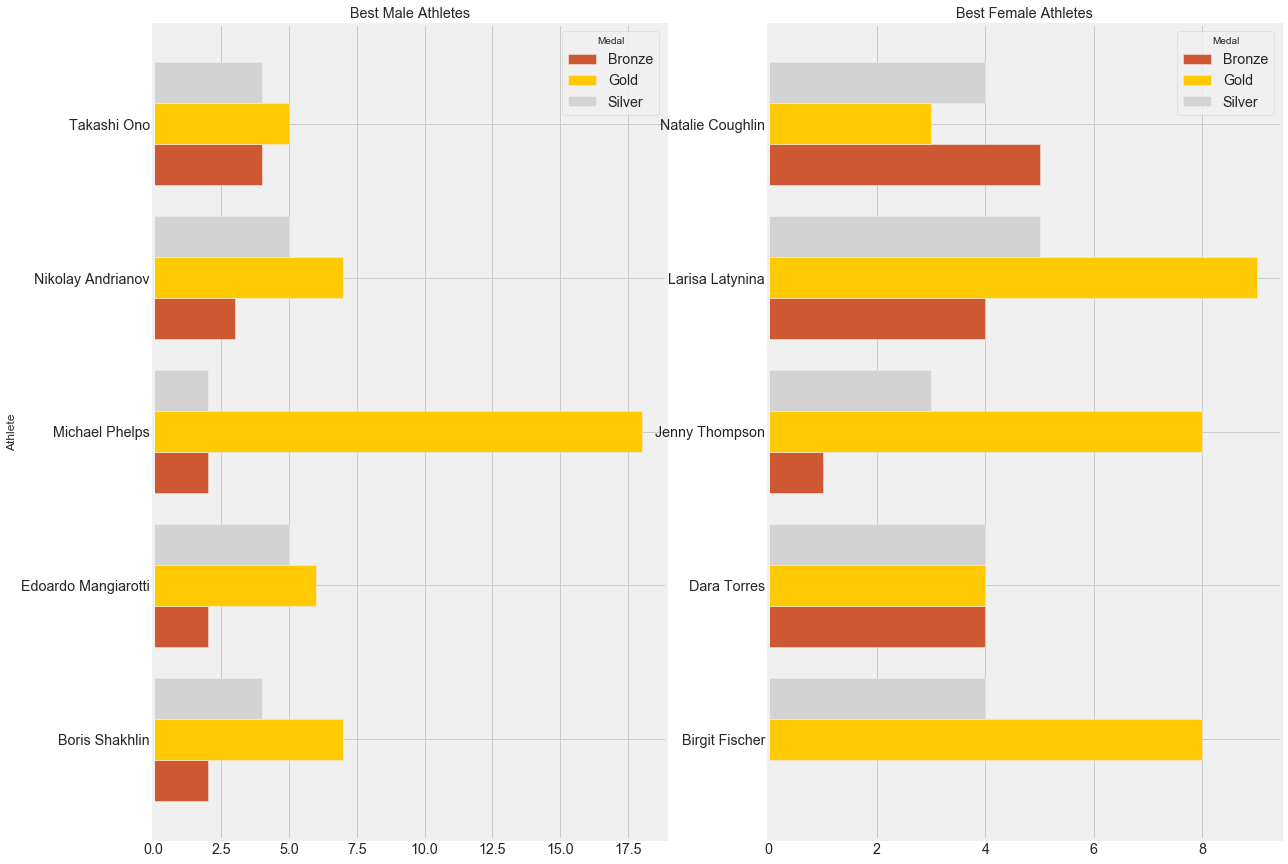

In [84]:
fig,ax=plt.subplots(1,2,figsize=(18,15))

male=olypics_df[olypics_df['Gender']=='Men']
male=male.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
male=male[male['Athlete'].isin(olypics_df['Athlete'].value_counts().index[:6])]
male=male.pivot('Athlete','Medal','Country')
male.plot.barh(width=0.8,color=['#CD5831','#FFCA01','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

female=olypics_df[olypics_df['Gender']=='Women']
female=female.groupby(['Athlete','Medal'])['Country'].count().reset_index().sort_values(by='Country',ascending=False)
female=female[female['Athlete'].isin(olypics_df['Athlete'].value_counts().index[:18])]
female=female.pivot('Athlete','Medal','Country')
female.plot.barh(width=0.8,color=['#CD5831','#FFCA01','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

In [101]:
print(male)
print(female)

Medal                Bronze  Gold  Silver
Athlete                                  
Boris Shakhlin       2       7     4     
Edoardo Mangiarotti  2       6     5     
Michael Phelps       2       18    2     
Nikolay Andrianov    3       7     5     
Takashi Ono          4       5     4     
Medal             Bronze  Gold  Silver
Athlete                               
Birgit Fischer   NaN      8.0   4.0   
Dara Torres       4.0     4.0   4.0   
Jenny Thompson    1.0     8.0   3.0   
Larisa Latynina   4.0     9.0   5.0   
Natalie Coughlin  5.0     3.0   4.0   


-  TOP five MALE ATHLETE are **Boris Shakhlin, Edoardo Mangiarotti, Michael Phelps, Nikolay Andrianov, Takashi On.**    
-  TOP five FEMALE ATHLETE are **Birgit Fischer, Dara Torres, Jenny Thompson, Larisa Latynina, Natalie Coughlin.**  

<a id=section50305></a> 

### 5.3.5 Gender Distribution of Total Medals 

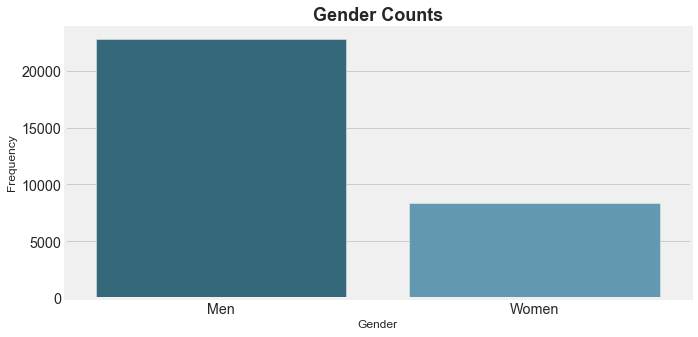

In [85]:
#  Gender wise distribution only
plt.figure(figsize=(10,5))
sns.countplot('Gender',data = olypics_df, order = olypics_df['Gender'].value_counts().index,palette="PuBuGn_d")
plt.title("Gender Counts",fontsize=18,fontweight="bold")
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

- Here we can clearly the Men are leading in Medals Tally than Women.
- Women Athlete are less thaen 50% in medal takin proportion then the male athlete.

<a id=section504></a>

## 5.4 Analysis being performed on the Medal 

<a id=section50401></a>
### 5.4.1 Medals count by year

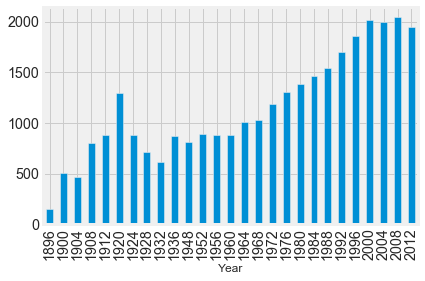

In [111]:
olypics_df.groupby('Year')['Medal'].count().plot.bar()

- Yearwise medal count has been increasing with increasing year

<a id=section50402></a>
### 5.4.2 Number of Medals count by Sport Category

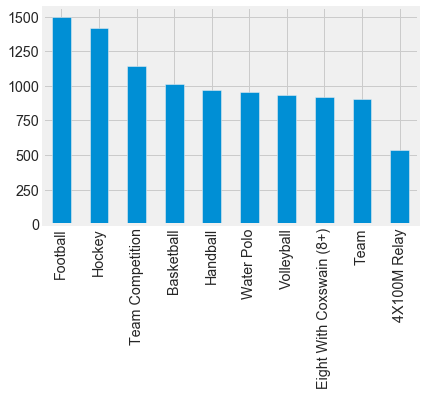

In [116]:
df = olypics_df['Event'].value_counts().head(10)
df.plot.bar()

- Counting of Number of Medals by Event seems to be incorrect as it seems that a Gold Medal in Football is counted 11 times

In [11]:
olypics_df[(olypics_df['Year']==1900) & (olypics_df['Event']=='Football') &  (olypics_df['Medal']=='Gold')]

Year   City     Sport Discipline                     Athlete Country  \
389  1900  Paris  Football  Football   BUCKENHAM, Claude Percy     GBR      
390  1900  Paris  Football  Football   BURRIDGE, T.E.              GBR      
391  1900  Paris  Football  Football   CHALK, Alfred Ernest        GBR      
392  1900  Paris  Football  Football   GROSLING, William Sullivan  GBR      
393  1900  Paris  Football  Football   HASLAM, A.                  GBR      
394  1900  Paris  Football  Football   JONES, J.H.                 GBR      
395  1900  Paris  Football  Football   NICHOLAS, J.                GBR      
396  1900  Paris  Football  Football   QUASH, William Francis      GBR      
397  1900  Paris  Football  Football   SPACKMAN, F.G.              GBR      
398  1900  Paris  Football  Football   TURNER, R.R.                GBR      
399  1900  Paris  Football  Football   ZEALLEY, James Edward       GBR      

    Gender     Event Medal  
389  Men    Football  Gold  
390  Men    Football  Gold  
391  Men    Football  Gold  
392  Men    Football  Gold  
393  Men    Football  Gold  
394  Men    Football  Gold  
395  Men    Football  Gold  
396  Men    Football  Gold  
397  Men    Football  Gold  
398  Men    Football  Gold  
399  Men    Football  Gold

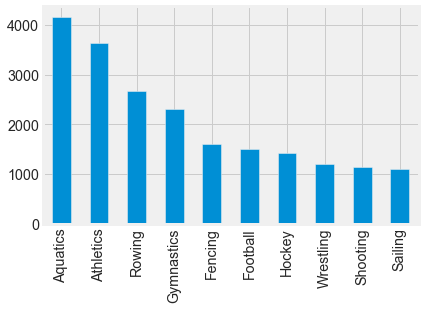

In [12]:
df = olypics_df['Sport'].value_counts().head(10)
df.plot.bar()

- Aquatics ,Atheletics, Rowing, Gymnastics, Fencing, Football, Hockey, Wrestling, Shooting,Sailing in the order of sports
  getting maximum medals

<a id=section50403></a>
### 5.4.3 Medal Distribution of top 10 countries

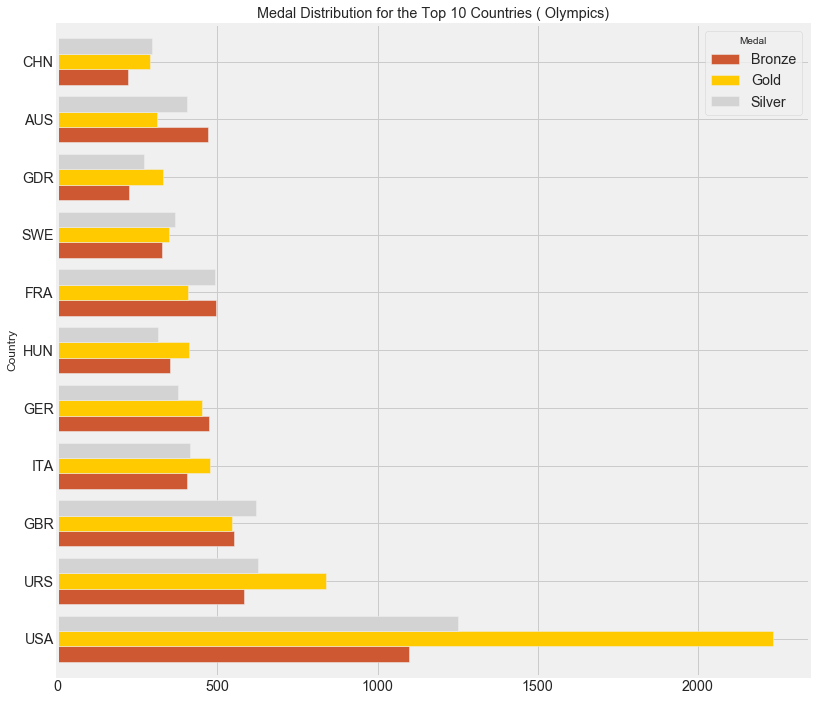

In [118]:
country_medal = olypics_df.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
country_medal = country_medal.pivot('Country','Medal','Gender').fillna(0)
top = country_medal.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD5832','#FFCA00','#D3D3D3'])
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medal Distribution for the Top 10 Countries ( Olympics)')
plt.show()

- The country with maximum number of medals is **USA followed by URS, GBR , ITA, GER, HUN, FRA, SWE, GDR, AUS, CHN.**

In [119]:
print(top)

Medal    Bronze    Gold  Silver
Country                        
USA      1098.0  2235.0  1252.0
URS      584.0   838.0   627.0 
GBR      553.0   546.0   621.0 
ITA      404.0   476.0   416.0 
GER      475.0   452.0   378.0 
HUN      351.0   412.0   316.0 
FRA      497.0   408.0   491.0 
SWE      328.0   349.0   367.0 
GDR      225.0   329.0   271.0 
AUS      472.0   312.0   405.0 
CHN      221.0   289.0   296.0 


<a id=section50404></a>
### 5.4.4 Yearwise distribution of GOLD SILVER and BRONZE

In [97]:
gold_df = olypics_df[olypics_df['Medal']=='Gold']
silver_df = olypics_df[olypics_df['Medal']=='Silver']
bronze_df = olypics_df[olypics_df['Medal']=='Bronze']
by_gold = gold_df.groupby(['Year']).count()['Medal']
by_silver = silver_df.groupby(['Year']).count()['Medal']
by_bronze = bronze_df.groupby(['Year']).count()['Medal']

Medal_Merge = pd.concat([by_gold,by_silver,by_bronze],axis=1)

Medal_Merge.columns = ['Gold_Medal', 'Silver_Medal', 'Bronze_Medal']

Medal_Merge

Gold_Medal  Silver_Medal  Bronze_Medal
Year                                        
1896  64          47            40          
1900  178         192           142         
1904  188         159           123         
1908  311         282           211         
1912  301         300           284         
1920  497         446           355         
1924  301         298           285         
1928  229         239           242         
1932  213         206           196         
1936  299         294           282         
1948  276         270           268         
1952  300         290           299         
1956  298         290           297         
1960  295         286           301         
1964  330         337           343         
1968  341         339           351         
1972  387         386           412         
1976  429         429           447         
1980  459         455           472         
1984  483         476           500         
1988  506         505           535         
1992  558         551           596         
1996  615         610           634         
2000  663         667           685         
2004  659         660           679         
2008  669         663           710         
2012  633         631           680

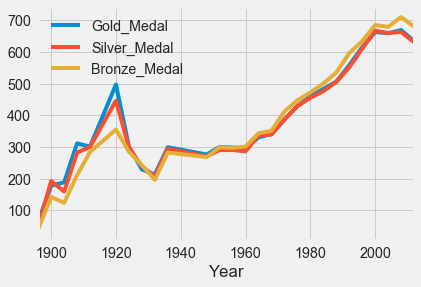

In [58]:
Medal_Merge.plot(kind='line')
plt.show()

__Showing Year wise distribution of all medals and we can see the no. of medals increasing significantly from 1900 to 2000__

<a id=section50405></a>
### 5.4.5 Contribution of different Medal by their Type

Text(0.5, 1.0, 'Donut Plot Depicting the proportion of each Medal Type')

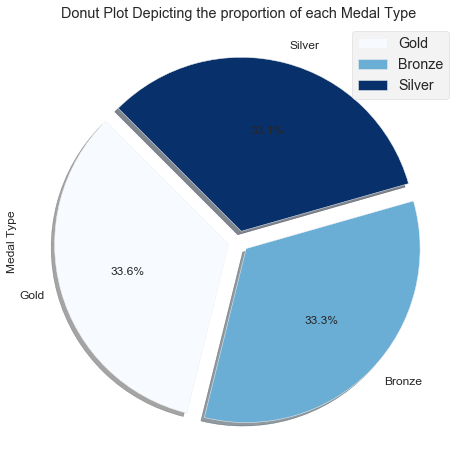

In [100]:
olypics_df['Medal'].value_counts().plot(kind='pie', explode=[0.06,0.06,0.06], fontsize=12, autopct='%3.1f%%', 
                                               figsize=(8,8), shadow=True, startangle=135, legend=True, cmap='Blues')

plt.ylabel('Medal Type')
plt.title('Donut Plot Depicting the proportion of each Medal Type')

__Here we can see the distribution of types of Medals and all medals are equally distributed.__

<a id=section6></a>

## 6. Conclusion


- The first modern Olympics were held in Athens, Greece, in 1896. In the opening ceremony, King Georgios I and a crowd of    60,000 spectators welcomed 280 participants from 13 nations (all male), who would compete in 43 events, including track and field, gymnastics, swimming, wrestling, cycling, tennis, weightlifting, shooting and fencing. All subsequent Olympiads have been numbered even when no Games take place (as in 1916, during World War I, and in 1940 and 1944, during World War II).
- The Olympics truly took off as an international sporting event after 1924, when the VIII Games were held in Paris. Some 3,000 athletes (with more than 100 women among them) from 44 nations competed that year, and for the first time the Games featured a closing ceremony.
-  Eighty years later, when the 2004 Summer Olympics returned to Athens for the first time in more than a century, nearly 11,000 athletes from a record 201 countries competed.
-  **USA** has dominated the Olympics all these years with maximum number of Medal Tally.
-  **Australia** is closely following up and has shown tremendous growth after 1990.
-  Number of Medals in Men Category were highest in 1920 Games and then was considerably reduced and then again was increasing and now showing sign of consolidation.
- Number of Medals in **Women Category** are rising with each games and now showing sign of consolidation.
- In This Analysis, we can see the trend and rise of Modern Olympics in more than 100 years history and how the popularity of olympics has made them one of the favourite games of every sports person in the every corner of the world.
- **Male Atheletes** are more than **Women Athletes** but the no. of women also increases over period of time as compared to Men.

<a id=section7></a>

## 7. Actionable Insights
-  Action to be taken for more female athlete participation in olympics although the female participation is increasing but it is very less upto now.
- **USA** is a leader in terms of medal count but need to see that other countries need to improve their strategies for the olympics. 

